# Imports

In [1]:
#normal imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Gradient Color Bar Plots
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import colors as mcolors, path

# References
https://matplotlib.org/stable/tutorials/colors/colormaps.html <br>
https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html

# Data

In [2]:
df = pd.DataFrame(data={'Month': [1, 2, 3, 4, 5, 6], 'Patients': [22, 53, 42, 18, 31, 28]})

In [3]:
df

,Month,Patients
0,1,22
1,2,53
2,3,42
3,4,18
4,5,31
5,6,28


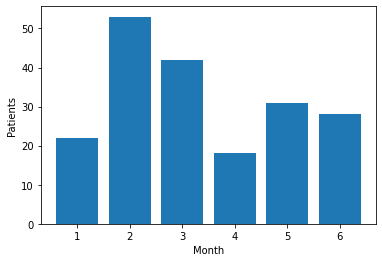

In [4]:
#our basic plot:
fig, ax = plt.subplots()
ax.bar(df.Month, df.Patients)
ax.set_ylabel('Patients')
ax.set_xlabel('Month')
plt.show()

# Viewing different types of colormaps

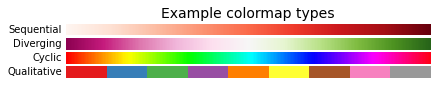

In [8]:
cmaps = {}
group_list = {}
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_gradients_custom(category, cmap_list, group_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormap types', fontsize=14)
    for ax, name, group in zip(axs, cmap_list, group_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-0.01, 0.5, group, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()
    plt.savefig('cmap_types.png')

plot_color_gradients_custom('Example', ['Reds', 'PiYG', 'hsv', 'Set1'], ['Sequential','Diverging','Cyclic', 'Qualitative'])

## Custom cmap plotter

In [9]:
def plot_color_gradient(cmap_name):
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))
    fig, ax = plt.subplots(figsize=(6.4,.5))
    ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(cmap_name))

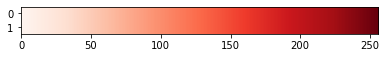

In [10]:
plot_color_gradient('Reds')

In [ ]:
#grabbing only 8 samples from the full "Reds" cmap, and make into a cmap we can apply
reds_mini = cm.get_cmap('Reds', 8)

In [82]:
#print the rgba values for the first element of the reds cmap
print(reds(0))

(1.0, 0.9607843137254902, 0.9411764705882353, 1.0)


In [85]:
print('reds.colors', reds_mini.N)

reds.colors 8


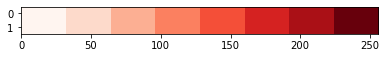

In [86]:
plot_color_gradient(reds_mini)

In [88]:
#default grabs 256 elements
reds= cm.get_cmap('Reds')
print('reds total rows:', reds.N)
print('RGBA for 100th element:', reds(99))

reds total rows: 256
RGBA for 100th element: (0.9878200692041523, 0.5559400230680507, 0.4304498269896194, 1.0)


In [89]:
viridis = cm.get_cmap('viridis', 8)
print('viridis.colors', viridis.colors)

viridis.colors [[0.267004 0.004874 0.329415 1.      ]
 [0.275191 0.194905 0.496005 1.      ]
 [0.212395 0.359683 0.55171  1.      ]
 [0.153364 0.497    0.557724 1.      ]
 [0.122312 0.633153 0.530398 1.      ]
 [0.288921 0.758394 0.428426 1.      ]
 [0.626579 0.854645 0.223353 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]


In [90]:
#printing the first 8 reds rgba values
print('reds(range(8))', reds(range(8)))

reds(range(8)) [[1.         0.96078431 0.94117647 1.        ]
 [0.99987697 0.95820069 0.93748558 1.        ]
 [0.99975394 0.95561707 0.93379469 1.        ]
 [0.99963091 0.95303345 0.93010381 1.        ]
 [0.99950788 0.95044983 0.92641292 1.        ]
 [0.99938485 0.94786621 0.92272203 1.        ]
 [0.99926182 0.94528258 0.91903114 1.        ]
 [0.99913879 0.94269896 0.91534025 1.        ]]


## use "to_rgba" to find the color codes for common named colors

In [91]:
myColor = mcolors.to_rgba("red", 0.8)
print(myColor)

(1.0, 0.0, 0.0, 0.8)


In [92]:
myColor = mcolors.to_rgba("blue", 0.8)
print(myColor)

(0.0, 0.0, 1.0, 0.8)


In [93]:
myColor = mcolors.to_rgba("white", 0.8)
print(myColor)

(1.0, 1.0, 1.0, 0.8)


In [24]:
# from matplotlib - copy viridis, then make the first 25 elements pink instead
viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
pink = np.array([248/256, 24/256, 148/256, 1])
newcolors[:25, :] = pink
newcmp = ListedColormap(newcolors)

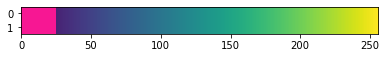

In [25]:
plot_color_gradient(newcmp)

In [26]:
def cmap_maker(transition, first_color, first_alpha, second_color, second_alpha):
    viridis = cm.get_cmap('viridis', 100)
    newcolors = viridis(np.linspace(0, 1, 100))
    color1 = mcolors.to_rgba(first_color, first_alpha)
    color2 = mcolors.to_rgba(second_color, second_alpha)
    newcolors[:transition, :] = color1
    newcolors[transition:100, :] = color2
    newcmp = ListedColormap(newcolors)
    return newcmp

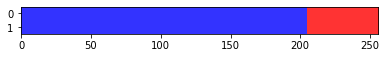

In [27]:
plot_color_gradient(cmap_maker(80,'blue', 0.8,'red', 0.8))

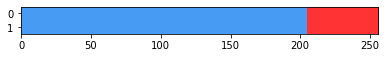

In [28]:
plot_color_gradient(cmap_maker(80,'#479bf3', 1,'red', 0.8))

# Manual Blending

*I don't recommend manual blending - this is more of a thought exercise to see if it could be done*

In [94]:
def cmap_maker_blend(transition, first_color, first_alpha, second_color, second_alpha):
    #fetch any colormap object
    viridis = cm.get_cmap('viridis', 100)
    #put into a colormap, which we can then alter
    newcolors = viridis(np.linspace(0, 1, 100))
    color1 = mcolors.to_rgba(first_color, first_alpha)
    color2 = mcolors.to_rgba(second_color, second_alpha)
    color3 = mcolors.to_rgba('green',0.8)
    newcolors[:transition-5, :] = color1
    newcolors[transition+5:100, :] = color2
    for x in range(1,11):
        factor1 = [(10-x)/10, (10-x)/10, (10-x)/10, (10-x)/10]
        factor2 = [x/10, x/10, x/10, x/10]
        color3 = np.add(np.multiply(color1, factor1), np.multiply(color2, factor2))
        newcolors[transition-6+x:transition-5+x, :]=color3
    newcmp = ListedColormap(newcolors)
    return newcmp

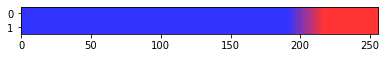

In [95]:
plot_color_gradient(cmap_maker_blend(80,'blue', 0.8,'red', 0.8))

# Introducing LinearSegmentedColormap

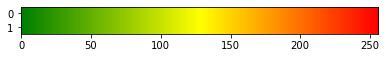

In [96]:
colors=["green","yellow","red"]
nodes = [0.0, 0.5, 1.0]
my_cmap = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))
plot_color_gradient(my_cmap)

Let's play with the "nodes" to tighten up the blending

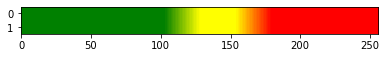

In [97]:
colors=["green","green","yellow","yellow","red","red"]
nodes = [0.0, 0.4, 0.5, 0.6,0.7,1.0]
my_cmap = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))
plot_color_gradient(my_cmap)

This would be more realistic for a two-color danger plot

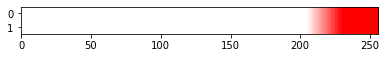

In [99]:
colors=["white","white","red","red"]
nodes = [0.0, 0.8, 0.9,1.0]
cmap2 = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))
plot_color_gradient(cmap2)

In [100]:
print('cmap2(range(256))', cmap2(range(256)))

cmap2(range(256)) [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 ...
 [1. 0. 0. 1.]
 [1. 0. 0. 1.]
 [1. 0. 0. 1.]]


## Random useful function for lightening colors

In [42]:
#reference this function for color tuning.  Link to stack overflow.  give credit
# https://stackoverflow.com/questions/37765197/darken-or-lighten-a-color-in-matplotlib
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [43]:
color2 = lighten_color('red',0.7)
print(color2)

(0.9999999999999999, 0.30000000000000016, 0.30000000000000016)


Let's use this function with our previous color sets

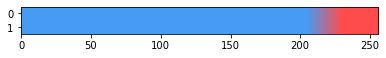

In [102]:
color2 = lighten_color('red',0.7)
color1='#479bf3' # hex code works!!!! blue
colors=[color1, color1, color2, color2]
nodes = [0.0, 0.8, 0.9,1.0]
cmap2 = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))
plot_color_gradient(cmap2)

# MAIN FUNCTIONS

In [45]:
def two_color_cmap(color1, color2, transition_value, transition_width, plot_min, plot_max):
    #build the colors sequence
    colors=[color1, color1, color2, color2]
    #scale the transition value into a 0-1 value in our plotted range
    transition = (transition_value - plot_min)/(plot_max - plot_min)
    #scale the transition width
    trans_width_scaled = transition_width / (plot_max - plot_min)
    #build the nodes list
    nodes=[0.0, transition - (trans_width_scaled/2), transition + (trans_width_scaled/2), 1.0]
    new_cmap = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))
    return(new_cmap)

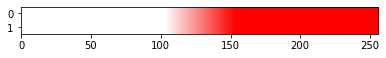

In [46]:
plot_color_gradient(two_color_cmap("white","red",5,2,0,10))

In [47]:
def three_color_cmap(color1, color2, color3, transition_value1, transition_width1, transition_value2, transition_width2, plot_min, plot_max):
    #set the colors used at each of the points specified at "nodes"
    colors=[color1, color1, color2, color2, color3, color3]
    #scale the transition value into a 0-1 value in our plotted range
    transition1 = (transition_value1 - plot_min)/(plot_max - plot_min)
    transition2 = (transition_value2 - plot_min)/(plot_max - plot_min)
    #scale the transition width
    trans_width_scaled1 = transition_width1 / (plot_max - plot_min)
    trans_width_scaled2 = transition_width2 / (plot_max - plot_min)
    #build the node list
    nodes=[0.0, transition1 - (trans_width_scaled1/2), transition1 + (trans_width_scaled1/2), transition2 - (trans_width_scaled2/2), 
           transition2 + (trans_width_scaled2/2), 1.0]
    new_cmap = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))
    return(new_cmap)

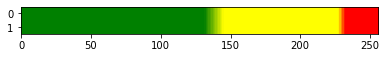

In [48]:
plot_color_gradient(three_color_cmap("green", "yellow","red",30,3,50,1,0,55.65))

# Apply to Plots

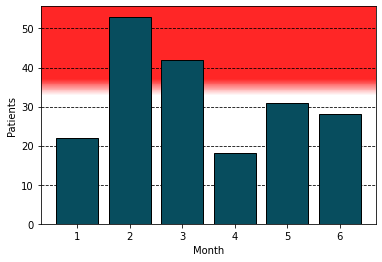

In [49]:
fig, ax = plt.subplots()
ax.bar(df.Month, df.Patients, color='#074d5e', edgecolor='black', zorder=3)
ax.set_ylabel('Patients')
ax.set_xlabel('Month')
ax.grid(which='major', axis='y', linestyle='--', color='black', zorder=0)

plotlim = plt.xlim() + plt.ylim()  
my_cmap= two_color_cmap("white", "#ff2626",35,4,plt.ylim()[0],plt.ylim()[1])
#set up the gradient
grad = np.atleast_2d(np.linspace(1,0,256)).T
ax.imshow(grad, cmap = my_cmap, aspect='auto', extent=plotlim)

plt.show()

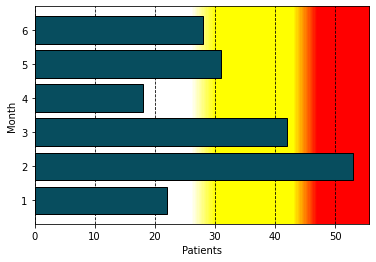

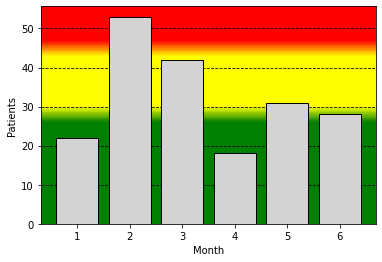

In [71]:
fig, ax = plt.subplots()
ax.bar(df.Month, df.Patients, color='lightgray', edgecolor='black', zorder=3)
ax.set_ylabel('Patients')
ax.set_xlabel('Month')
ax.grid(which='major', axis='y', linestyle='--', color='black', zorder=0)
plotlim = plt.xlim() + plt.ylim()  
my_cmap= three_color_cmap("green", "yellow","red",28,4,45,4,plt.ylim()[0],plt.ylim()[1])
grad = np.atleast_2d(np.linspace(1,0,256)).T
ax.imshow(grad, cmap = my_cmap, aspect='auto', extent=plotlim)

plt.show()

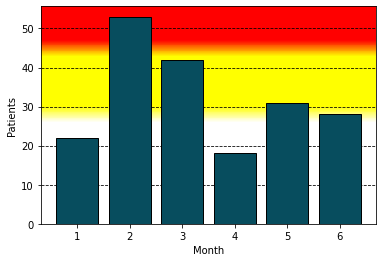

In [72]:
fig, ax = plt.subplots()
ax.bar(df.Month, df.Patients, color='#074d5e', edgecolor='black', zorder=3)
ax.set_ylabel('Patients')
ax.set_xlabel('Month')
ax.grid(which='major', axis='y', linestyle='--', color='black', zorder=0)
plotlim = plt.xlim() + plt.ylim()  
my_cmap= three_color_cmap("white", "yellow","red",28,4,45,4,plt.ylim()[0],plt.ylim()[1])
grad = np.atleast_2d(np.linspace(1,0,256)).T
ax.imshow(grad, cmap = my_cmap, aspect='auto', extent=plotlim)

plt.show()

## Horizontal Plots

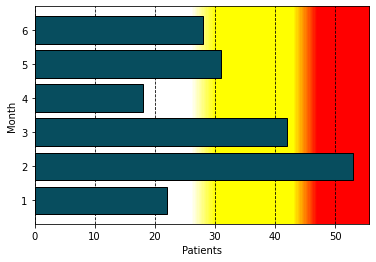

In [73]:
fig, ax = plt.subplots()
ax.barh(df.Month, df.Patients, color='#074d5e', edgecolor='black', zorder=3)
#switch the labels
ax.set_xlabel('Patients')
ax.set_ylabel('Month')
plotlim = plt.xlim() + plt.ylim()  
ax.grid(which='major', axis='x', linestyle='--', color='black', zorder=0)
# We now pass in xlim() instead
my_cmap= three_color_cmap('white', 'yellow', 'red' ,28,4,45,4,plt.xlim()[0],plt.xlim()[1])
# Don't use the transpose ".T" if making horizontal plots
grad = np.atleast_2d(np.linspace(0,1,256))
ax.imshow(grad, cmap = my_cmap, aspect='auto', extent=plotlim)
plt.show()

### Understanding grad

In [74]:
grad = np.atleast_2d(np.linspace(0,1,256)).T
print(grad[0:5])

[[0.        ]
 [0.00392157]
 [0.00784314]
 [0.01176471]
 [0.01568627]]


In [75]:
grad = np.atleast_2d(np.linspace(0,1,256))
print(grad[0][0:5])

[0.         0.00392157 0.00784314 0.01176471 0.01568627]


## Line Plots

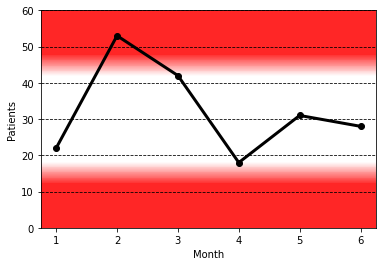

In [76]:
fig, ax = plt.subplots()
ax.plot(df.Month, df.Patients, marker='o', color='black', linewidth=3)
ax.set_ylabel('Patients')
ax.set_xlabel('Month')
ax.set_ylim(0,60)
ax.grid(which='major', axis='y', linestyle='--', color='black')
plotlim = plt.xlim() + plt.ylim()  
my_cmap= three_color_cmap("#ff2626", "white","#ff2626",15,6,45,6,plt.ylim()[0],plt.ylim()[1])
grad = np.atleast_2d(np.linspace(1,0,256)).T
ax.imshow(grad, cmap = my_cmap, aspect='auto', extent=plotlim)
plt.show()

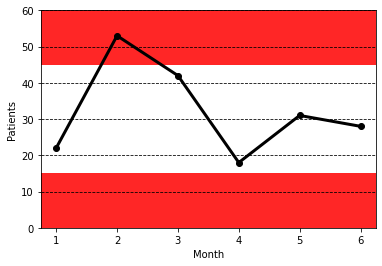

In [77]:
fig, ax = plt.subplots()
ax.plot(df.Month, df.Patients, marker='o', color='black', linewidth=3)
ax.set_ylabel('Patients')
ax.set_xlabel('Month')
ax.set_ylim(0,60)
ax.grid(which='major', axis='y', linestyle='--', color='black')
plotlim = plt.xlim() + plt.ylim()  
my_cmap= three_color_cmap("#ff2626", "white","#ff2626",15,0,45,0,plt.ylim()[0],plt.ylim()[1])
grad = np.atleast_2d(np.linspace(1,0,256)).T
ax.imshow(grad, cmap = my_cmap, aspect='auto', extent=plotlim)
plt.show()

## Side-by-side comparison

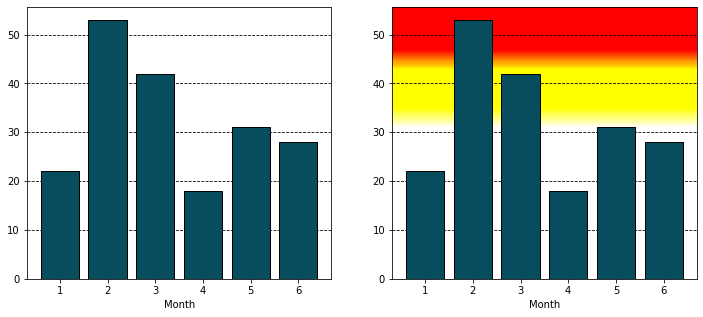

In [78]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.bar(df.Month, df.Patients, color='#074d5e', edgecolor='black', zorder=3)
ax1.set_xlabel('Month')
ax1.grid(which='major', axis='y', linestyle='--', color='black', zorder=0)
ax2.bar(df.Month, df.Patients, color='#074d5e', edgecolor='black', zorder=3)
ax2.set_xlabel('Month')
ax2.grid(which='major', axis='y', linestyle='--', color='black', zorder=0)
plotlim = plt.xlim() + plt.ylim()  
my_cmap= three_color_cmap("white", "yellow","red",33,4,45,4,plt.ylim()[0],plt.ylim()[1])
grad = np.atleast_2d(np.linspace(1,0,256)).T
ax2.imshow(grad, cmap = my_cmap, aspect='auto', extent=plotlim)
plt.savefig('comparison.png')
plt.show()
